In [8]:
# faceMask and faceMask2 hDDM face ratings analysis script: mask analyses of false negatives (failing to ID correct emotion)
# 22/03/21

# note: to be run within python 3.5 environment named "hddm" (from console: 'source activate hddm')
# confirm jupyter notebook is launching from "hddm" environment (see top-right: 'conda env:hddm')

# set up
import numpy as np
print(np.__version__) # should be 1.11.3

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from patsy import dmatrix

import hddm
print(hddm.__version__) # should be 0.6.0

1.11.1
0.6.0


In [9]:
# load hDDM-processed data from CSV file into a NumPy structured array
data1 = hddm.load_csv('faceMask_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data1 = hddm.utils.flip_errors(data1)

# check dataset
data1.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
0,gc2le9xecjp1stz,0,3,angry,0,_faces/22_F_R_U.jpg,22_F_R_U,22,F,surprised,upper,0,-4.636150,0,0,0,0,0,50
1,gc2le9xecjp1stz,0,3,angry,1,_faces/07_M_H_L.jpg,07_M_H_L,7,M,happy,lower,0,-2.079460,0,0,0,50,0,0
2,gc2le9xecjp1stz,0,3,angry,2,_faces/46_M_R_X.jpg,46_M_R_X,46,M,surprised,baseline,0,-1.847670,0,0,0,0,0,100
3,gc2le9xecjp1stz,0,3,angry,3,_faces/47_M_S_L.jpg,47_M_S_L,47,M,sad,lower,0,-6.506275,0,0,0,0,50,0
4,gc2le9xecjp1stz,0,3,angry,4,_faces/25_M_R_X.jpg,25_M_R_X,25,M,surprised,baseline,0,-1.536780,0,0,0,0,0,100
5,gc2le9xecjp1stz,0,3,angry,5,_faces/27_F_A_U.jpg,27_F_A_U,27,F,angry,upper,1,1.906175,50,0,0,0,0,0
6,gc2le9xecjp1stz,0,3,angry,6,_faces/08_F_S_U.jpg,08_F_S_U,8,F,sad,upper,0,-2.182530,0,0,0,0,50,0
7,gc2le9xecjp1stz,0,3,angry,7,_faces/38_M_H_X.jpg,38_M_H_X,38,M,happy,baseline,0,-1.445230,0,0,0,100,0,0
8,gc2le9xecjp1stz,0,3,angry,8,_faces/30_M_A_U.jpg,30_M_A_U,30,M,angry,upper,1,1.405270,50,0,0,0,0,0
9,gc2le9xecjp1stz,0,3,angry,9,_faces/04_F_R_U.jpg,04_F_R_U,4,F,surprised,upper,0,-1.945385,0,0,0,0,0,50


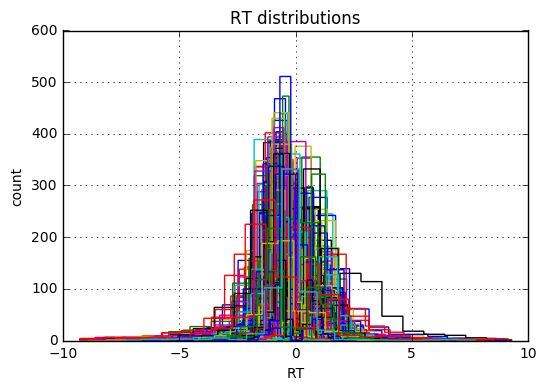

In [10]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data1.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [11]:
# subset dataset by emotion rating type (angry) and facial expression (angry)
xx1_data = data1.loc[(data1['emotionRating'] == data1['expression'])]
xx1_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
5,gc2le9xecjp1stz,0,3,angry,5,_faces/27_F_A_U.jpg,27_F_A_U,27,F,angry,upper,1,1.906175,50,0,0,0,0,0
8,gc2le9xecjp1stz,0,3,angry,8,_faces/30_M_A_U.jpg,30_M_A_U,30,M,angry,upper,1,1.405270,50,0,0,0,0,0
15,gc2le9xecjp1stz,0,3,angry,17,_faces/27_F_A_L.jpg,27_F_A_L,27,F,angry,lower,1,1.293860,50,0,0,0,0,0
17,gc2le9xecjp1stz,0,3,angry,19,_faces/15_M_A_U.jpg,15_M_A_U,15,M,angry,upper,1,2.019210,50,0,0,0,0,0
29,gc2le9xecjp1stz,0,3,angry,31,_faces/58_F_A_X.jpg,58_F_A_X,58,F,angry,baseline,1,1.656685,100,0,0,0,0,0
32,gc2le9xecjp1stz,0,3,angry,34,_faces/15_M_A_L.jpg,15_M_A_L,15,M,angry,lower,1,1.007755,50,0,0,0,0,0
35,gc2le9xecjp1stz,0,3,angry,37,_faces/27_F_A_X.jpg,27_F_A_X,27,F,angry,baseline,1,0.997660,100,0,0,0,0,0
38,gc2le9xecjp1stz,0,3,angry,40,_faces/49_M_A_L.jpg,49_M_A_L,49,M,angry,lower,0,-0.940125,50,0,0,0,0,0
41,gc2le9xecjp1stz,0,3,angry,43,_faces/30_M_A_X.jpg,30_M_A_X,30,M,angry,baseline,1,0.927440,100,0,0,0,0,0
43,gc2le9xecjp1stz,0,3,angry,45,_faces/12_F_A_U.jpg,12_F_A_U,12,F,angry,upper,1,1.621310,50,0,0,0,0,0


In [12]:
# drop any subjects missing columns in design matrix (otherwise produces error)

In [13]:
# define model
m_xx1 = hddm.HDDMRegressor(xx1_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\becky\Anaconda3\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 22272.1 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                        mean         std         2.5q         25q         50q         75q      97.5q       mc err
a                                    1.75905   0.0307102      1.70185     1.73807     1.75784     1.77936    1.82064  0.000545709
a_std                               0.460892   0.0232757     0.417754    0.445001    0.459983    0.475451   0.510809  0.000470002
a_subj.02hcv424u29nd5w               2.43985    0.153118      2.16297     2.33217     2.43226     2.53832    2.76408   0.00384754
a_subj.02k2uwlhgxnumn9                 1.675   0.0993272      1.49218      1.6056      1.6707     1.74049    1.88207   0.00264654
a_subj.03g7h2hzq4o3g26               3.10405     0.13723      2.84654     3.01153     3.09987     3.19147    3.38535   0.00249344
a_subj.0nmr75cysk1ae0e                2.0148    0.103939      1.82238     1.94271     2.00858     2.08252    2.23341   0.00236548
a_subj.0t8qp67pqkw36cb               1.77247   0.0794607      1.62671     1.71914     1.76

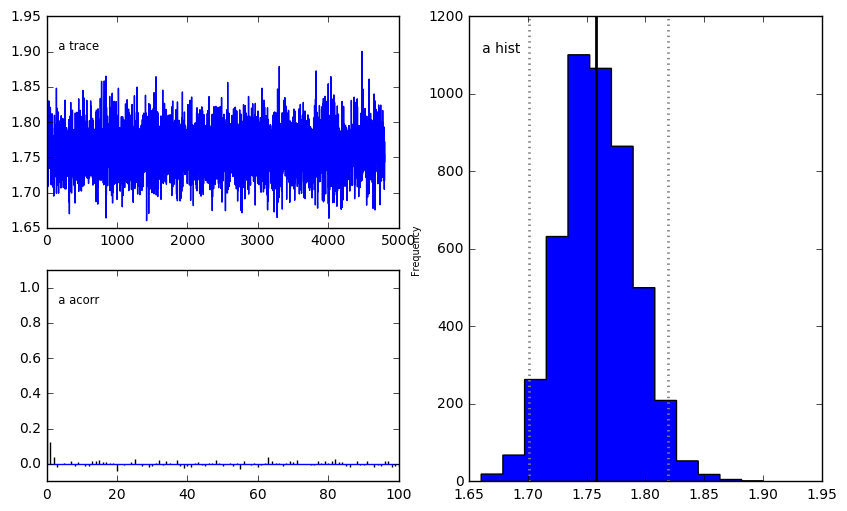

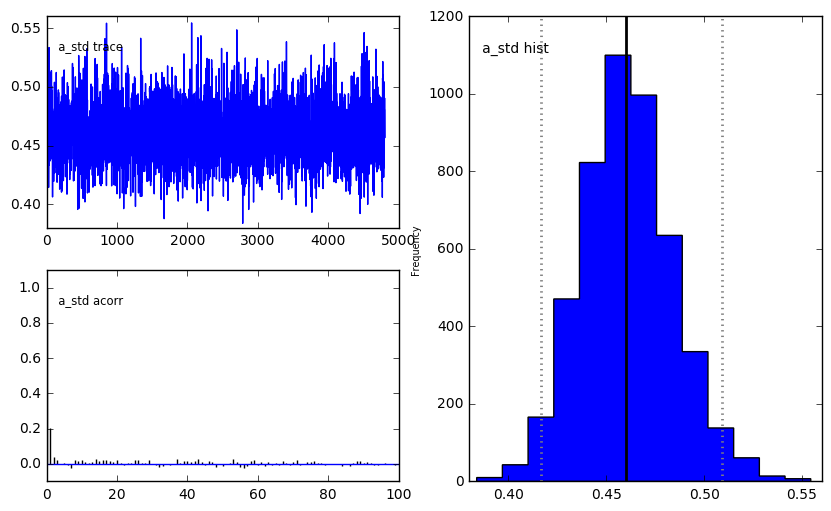

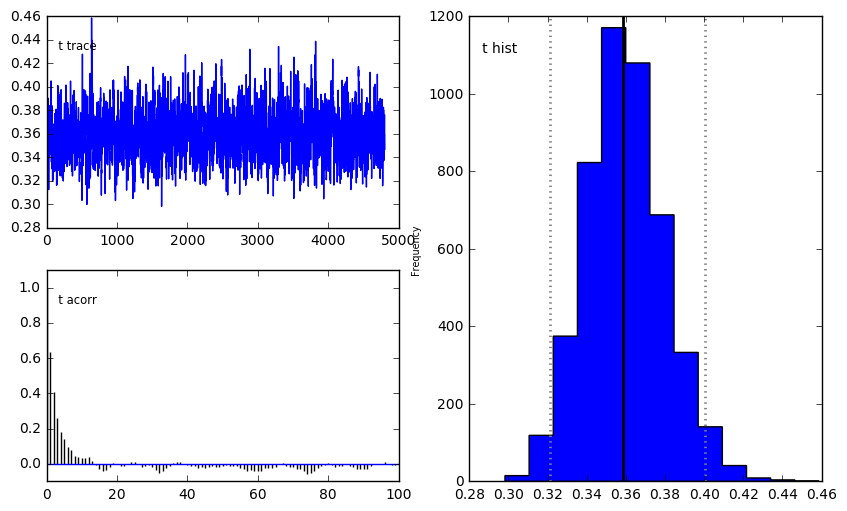

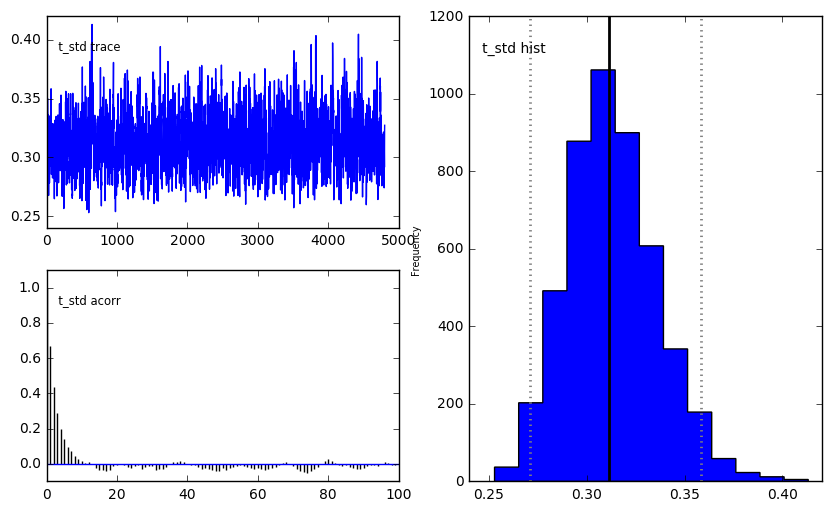

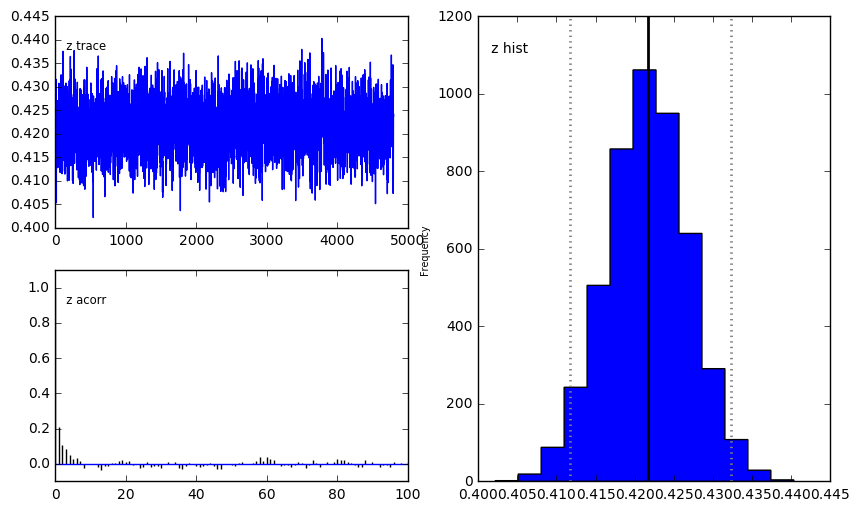

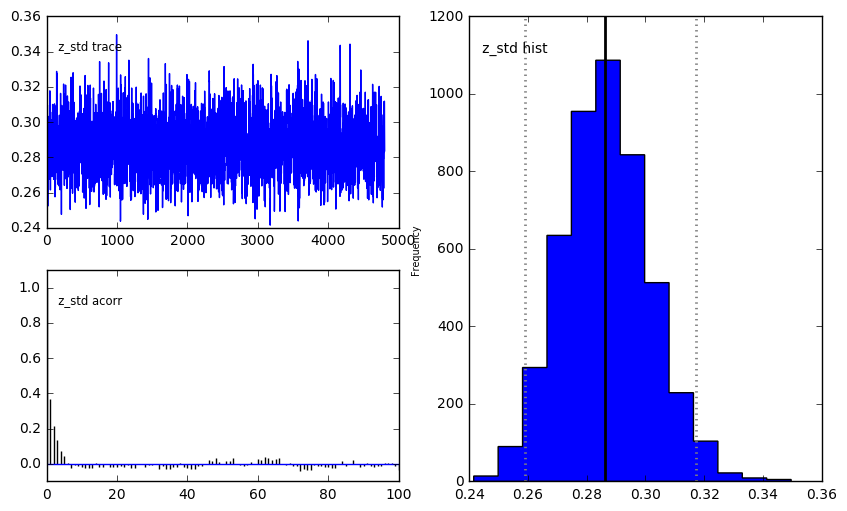

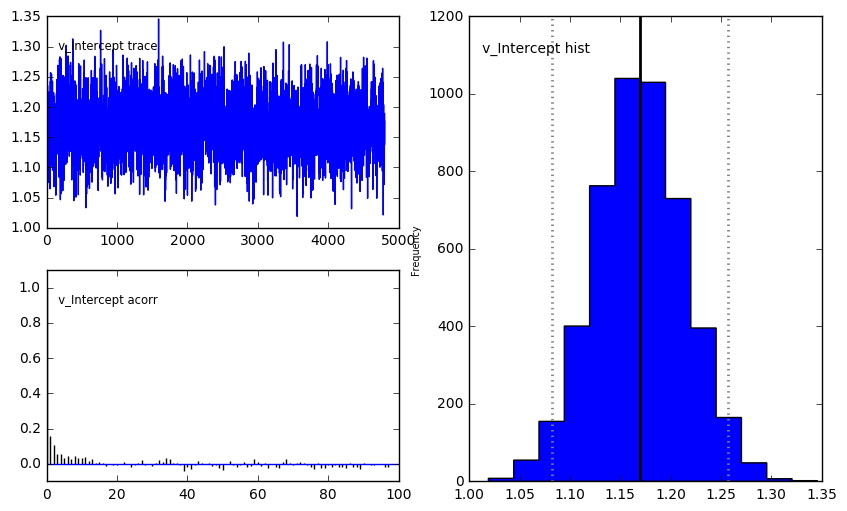

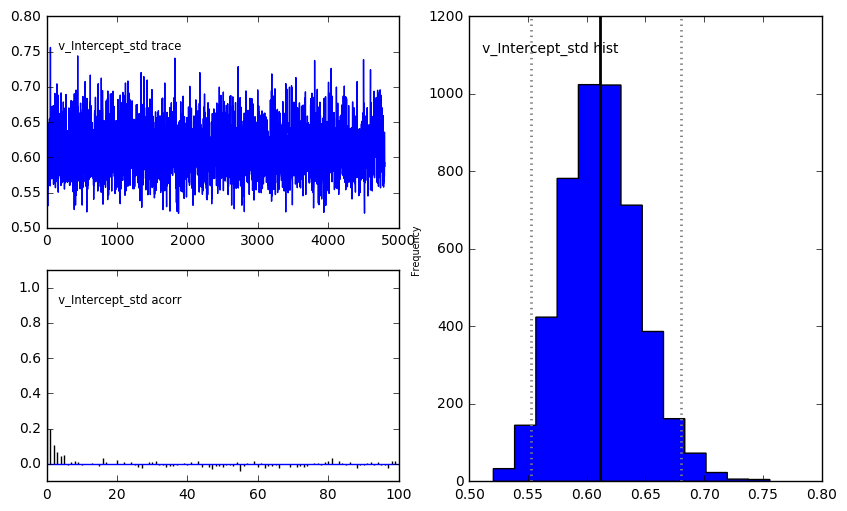

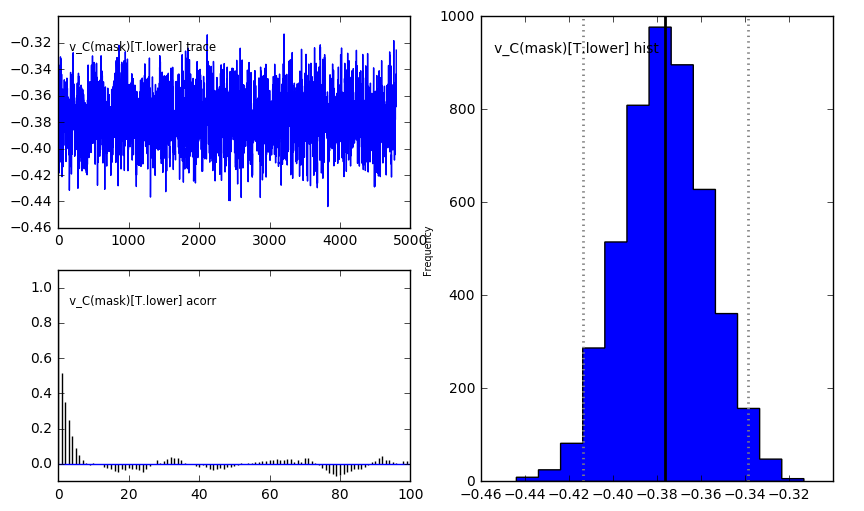

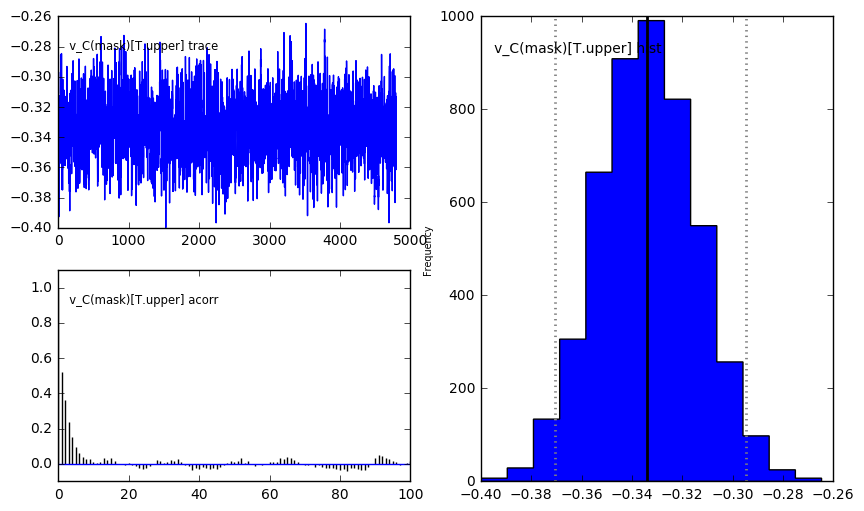

In [14]:
# run model
m_xx1.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_xx1.print_stats()
m_xx1.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std       2.5q        25q  \
a                                   1.75905  0.0307102    1.70185    1.73807   
a_std                              0.460892  0.0232757   0.417754   0.445001   
a_subj.02hcv424u29nd5w              2.43985   0.153118    2.16297    2.33217   
a_subj.02k2uwlhgxnumn9                1.675  0.0993272    1.49218     1.6056   
a_subj.03g7h2hzq4o3g26              3.10405    0.13723    2.84654    3.01153   
a_subj.0nmr75cysk1ae0e               2.0148   0.103939    1.82238    1.94271   
a_subj.0t8qp67pqkw36cb              1.77247  0.0794607    1.62671    1.71914   
a_subj.0vfpn4uf3t031qu              1.16549  0.0514033    1.06883    1.13101   
a_subj.11dsfdtym1yy5mx              1.78219  0.0747225    1.64327    1.73061   
a_subj.1d3dadyu4ekqb4q              1.52945  0.0891871    1.36504    1.46752   
a_subj.1mt2emp4645cbl1                2.152  0.0960598    1.96742     2.0867   
a_subj.1rst24mbtgy9rc8               1.7

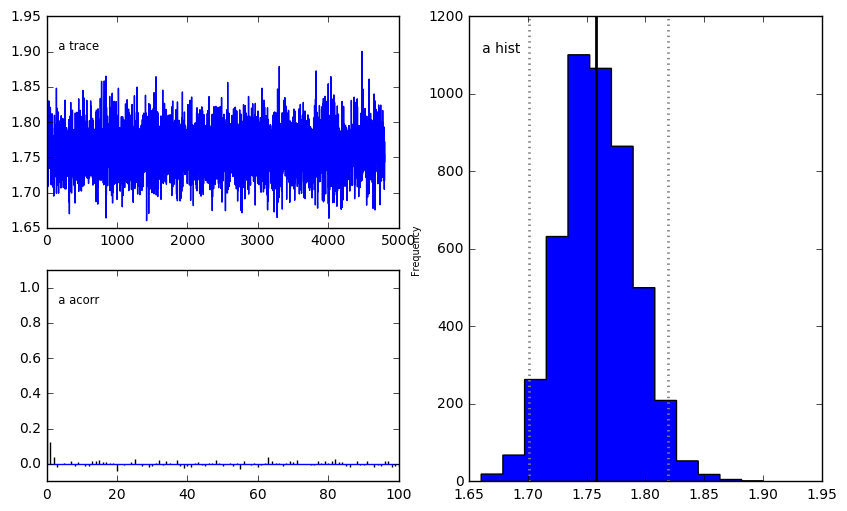

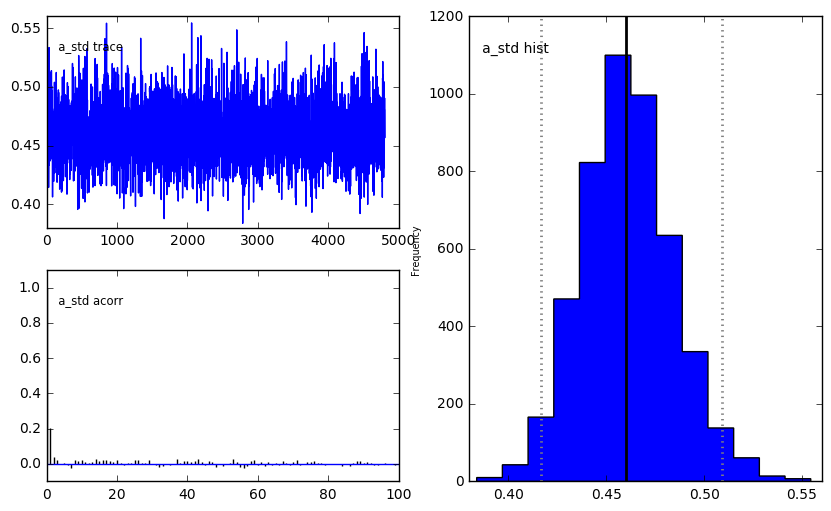

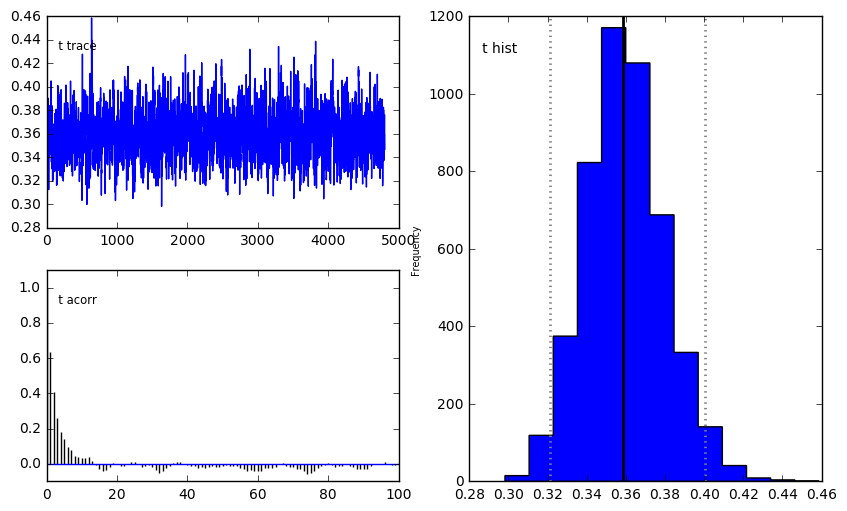

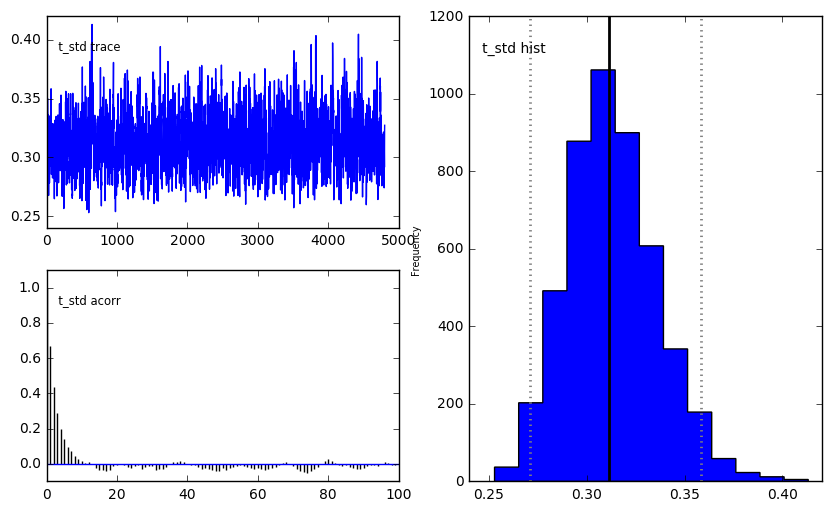

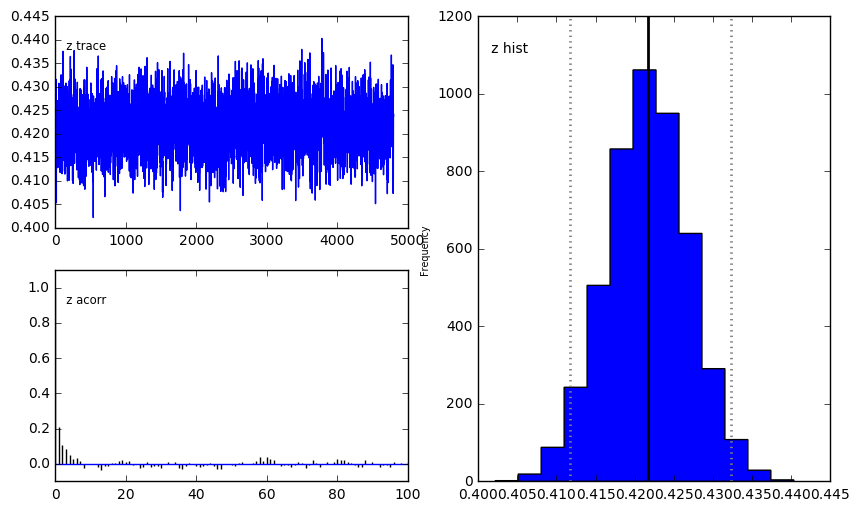

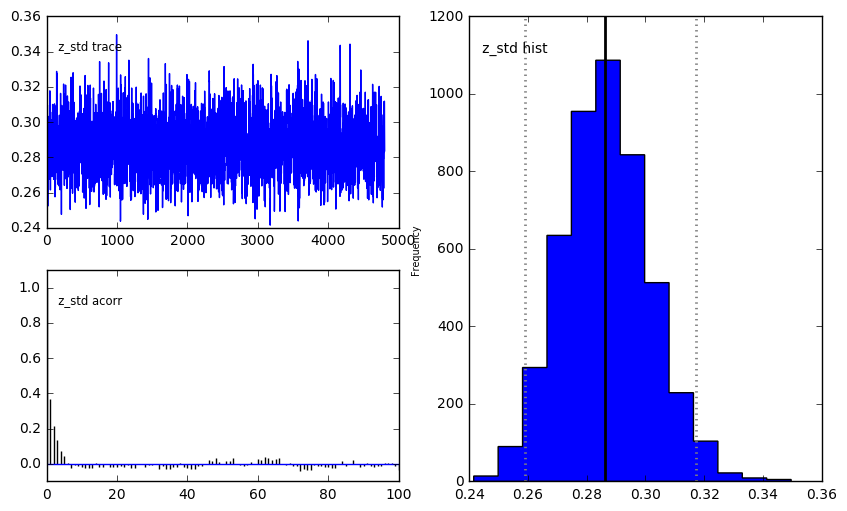

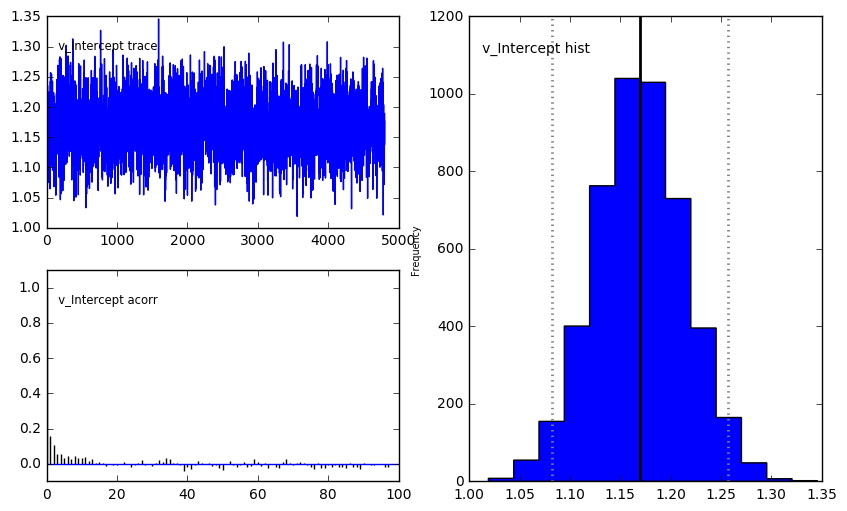

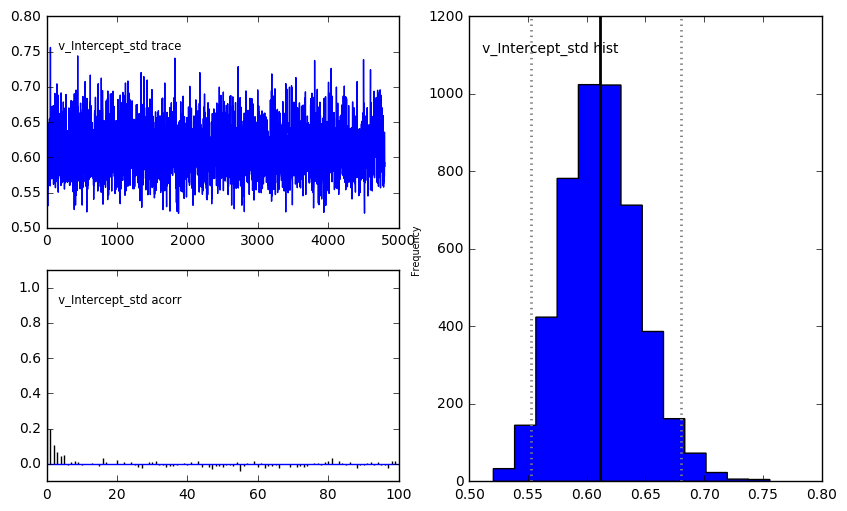

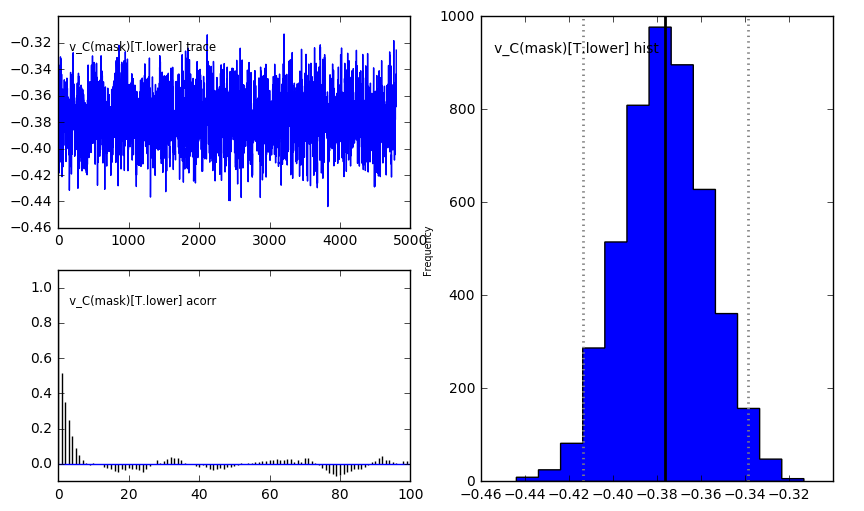

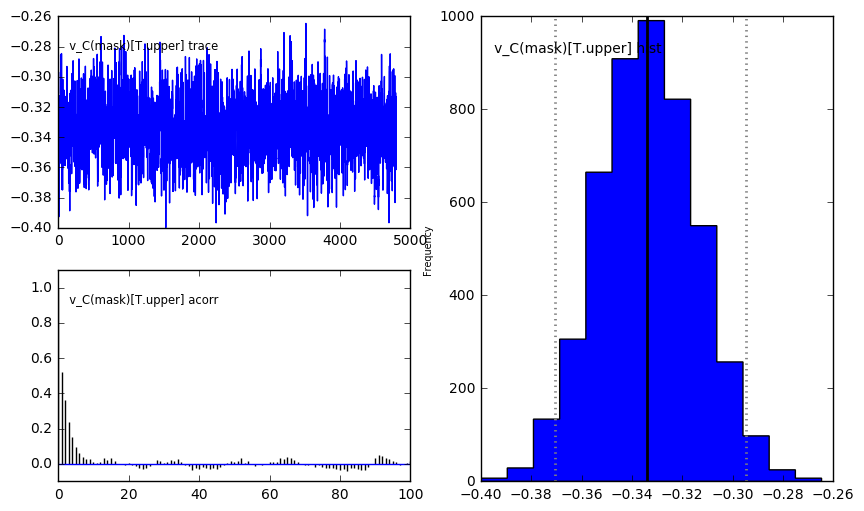

In [15]:
# save model stats
xx1_stats = m_xx1.gen_stats()
print(xx1_stats)
xx1_stats.to_csv('xx1_5000/faceMask_hddm_drift_maskFalseNegatives_xx1_5000.csv', index=True)

# save model posterior plots
m_xx1.plot_posteriors(path='xx1_5000/_posteriors', save=True)

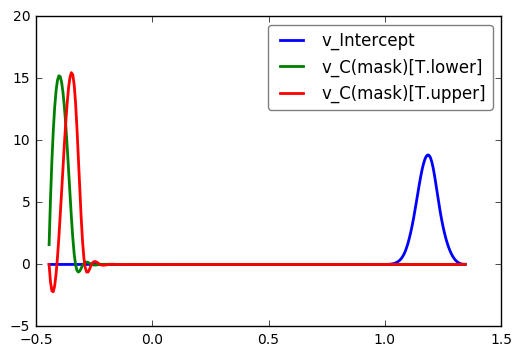

In [16]:
# plot model posteriors by mask
xx1_v_none, xx1_v_lower, xx1_v_upper = m_xx1.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([xx1_v_none, xx1_v_lower, xx1_v_upper])
plt.savefig('xx1_5000/faceMask_hddm_drift_maskFalsePositives_xx1_5000_v_mask.pdf')

In [30]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(xx1_v_none < 0) = ", (xx1_v_none.trace() < 0).mean())
print("P(xx1_v_lower > 0) = ", (xx1_v_lower.trace() > 0).mean())
print("P(xx1_v_upper > 0) = ", (xx1_v_upper.trace() > 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(xx1_v_lower > xx1_v_upper) = ", (xx1_v_lower.trace() > xx1_v_upper.trace()).mean())

P(xx1_v_none < 0) =  0.0
P(xx1_v_lower > 0) =  0.0
P(xx1_v_upper > 0) =  0.0
P(xx1_v_lower > xx1_v_upper) =  0.0133333333333


In [18]:
# load hDDM-processed data from CSV file into a NumPy structured array
data2 = hddm.load_csv('faceMask2_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data2 = hddm.utils.flip_errors(data2)

# check dataset
data2.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
0,lbmmswtrr0mpvov,0,3,surprised,0,_faces/HM08_F_X.jpg,HM08_F_X,HM08,H,M,fearful,baseline,1,2.248290,0,0,100,0,0,0
1,lbmmswtrr0mpvov,0,3,surprised,1,_faces/BM17_R_X.jpg,BM17_R_X,BM17,B,M,surprised,baseline,1,1.122130,0,0,0,0,0,100
2,lbmmswtrr0mpvov,0,3,surprised,2,_faces/WF05_S_X.jpg,WF05_S_X,WF05,W,F,sad,baseline,0,-1.093135,0,0,0,0,100,0
3,lbmmswtrr0mpvov,0,3,surprised,3,_faces/BM17_R_L.jpg,BM17_R_L,BM17,B,M,surprised,lower,1,1.347000,0,0,0,0,0,50
4,lbmmswtrr0mpvov,0,3,surprised,4,_faces/BF10_D_X.jpg,BF10_D_X,BF10,B,F,disgusted,baseline,0,-1.586875,0,100,0,0,0,0
5,lbmmswtrr0mpvov,0,3,surprised,5,_faces/BF15_F_L.jpg,BF15_F_L,BF15,B,F,fearful,lower,1,1.020070,0,0,50,0,0,0
6,lbmmswtrr0mpvov,0,3,surprised,6,_faces/AM07_S_X.jpg,AM07_S_X,AM07,A,M,sad,baseline,0,-1.092280,0,0,0,0,100,0
7,lbmmswtrr0mpvov,0,3,surprised,7,_faces/BF10_D_L.jpg,BF10_D_L,BF10,B,F,disgusted,lower,0,-1.574250,0,50,0,0,0,0
8,lbmmswtrr0mpvov,0,3,surprised,8,_faces/AM07_S_U.jpg,AM07_S_U,AM07,A,M,sad,upper,0,-1.219265,0,0,0,0,50,0
9,lbmmswtrr0mpvov,0,3,surprised,9,_faces/BM16_H_U.jpg,BM16_H_U,BM16,B,M,happy,upper,0,-1.092995,0,0,0,50,0,0


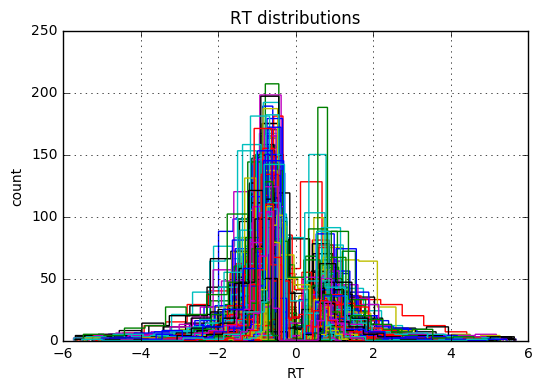

In [19]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data2.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [20]:
# subset dataset by emotion rating type (angry) and facial expression (angry)
xx2_data = data2.loc[(data2['emotionRating'] == data2['expression'])]
xx2_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
1,lbmmswtrr0mpvov,0,3,surprised,1,_faces/BM17_R_X.jpg,BM17_R_X,BM17,B,M,surprised,baseline,1,1.122130,0,0,0,0,0,100
3,lbmmswtrr0mpvov,0,3,surprised,3,_faces/BM17_R_L.jpg,BM17_R_L,BM17,B,M,surprised,lower,1,1.347000,0,0,0,0,0,50
13,lbmmswtrr0mpvov,0,3,surprised,13,_faces/AM04_R_L.jpg,AM04_R_L,AM04,A,M,surprised,lower,0,-1.250875,0,0,0,0,0,50
18,lbmmswtrr0mpvov,0,3,surprised,18,_faces/WF02_R_X.jpg,WF02_R_X,WF02,W,F,surprised,baseline,1,0.676070,0,0,0,0,0,100
31,lbmmswtrr0mpvov,0,3,surprised,31,_faces/AM04_R_X.jpg,AM04_R_X,AM04,A,M,surprised,baseline,1,1.268375,0,0,0,0,0,100
36,lbmmswtrr0mpvov,0,3,surprised,36,_faces/WF02_R_U.jpg,WF02_R_U,WF02,W,F,surprised,upper,1,0.908140,0,0,0,0,0,50
44,lbmmswtrr0mpvov,0,3,surprised,44,_faces/WF02_R_L.jpg,WF02_R_L,WF02,W,F,surprised,lower,1,0.850425,0,0,0,0,0,50
45,lbmmswtrr0mpvov,0,3,surprised,45,_faces/AM04_R_U.jpg,AM04_R_U,AM04,A,M,surprised,upper,1,0.876780,0,0,0,0,0,50
51,lbmmswtrr0mpvov,0,3,surprised,51,_faces/BM17_R_U.jpg,BM17_R_U,BM17,B,M,surprised,upper,0,-0.725275,0,0,0,0,0,50
57,lbmmswtrr0mpvov,1,4,fearful,57,_faces/HF09_F_X.jpg,HF09_F_X,HF09,H,F,fearful,baseline,1,1.147445,0,0,100,0,0,0


In [21]:
# drop any subjects missing columns in design matrix (otherwise produces error)

In [22]:
# define model
m_xx2 = hddm.HDDMRegressor(xx2_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\becky\Anaconda3\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 26155.3 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean         std        2.5q        25q        50q        75q      97.5q       mc err
a                                   1.59429   0.0232408     1.54921    1.57904    1.59416    1.61012    1.63894  0.000446569
a_std                               0.35386     0.01811     0.32072   0.341011   0.353036   0.366388   0.390753   0.00039916
a_subj.09coqg8hlpux6fe              1.23749   0.0858264     1.08247    1.17791    1.23237    1.29415    1.41846   0.00193176
a_subj.0b3t2skj9mlhbkn              1.51703    0.106526     1.31971    1.44354     1.5119    1.58664    1.74012   0.00219944
a_subj.0bcg7mtj2n1jjw9              3.24757    0.263404     2.77962    3.06751    3.23235    3.41022    3.82177   0.00712486
a_subj.0s53r30oouek89b              2.20324    0.149027     1.93333    2.09954    2.19703    2.29597    2.52059   0.00353317
a_subj.0uj9gbhag3o1w1v              1.73215    0.134698     1.49487    1.63829    1.72482    1.81538    2.02425   0.00316507


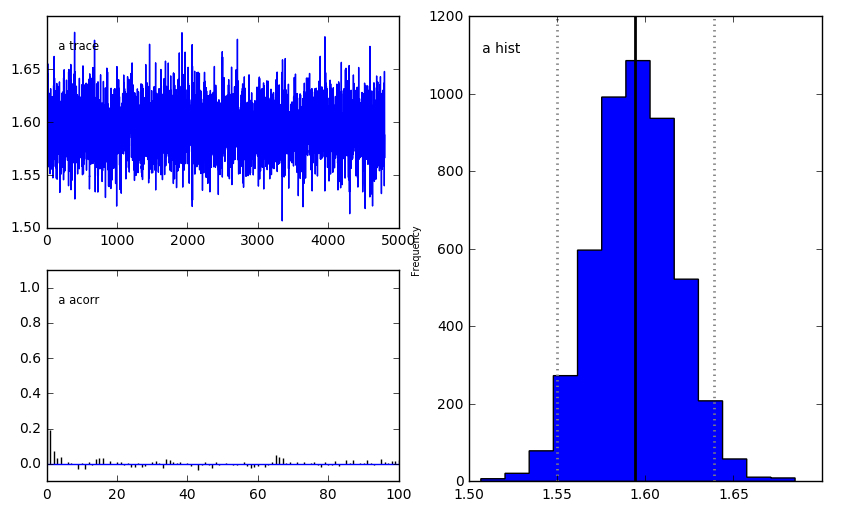

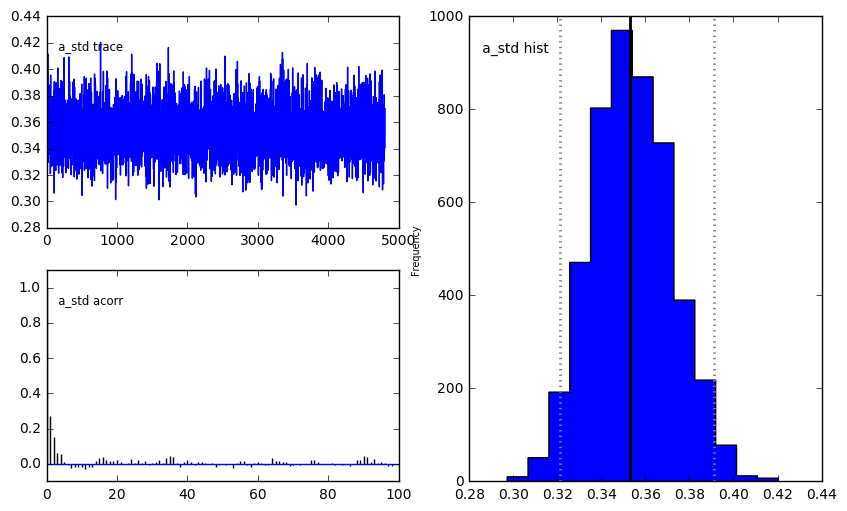

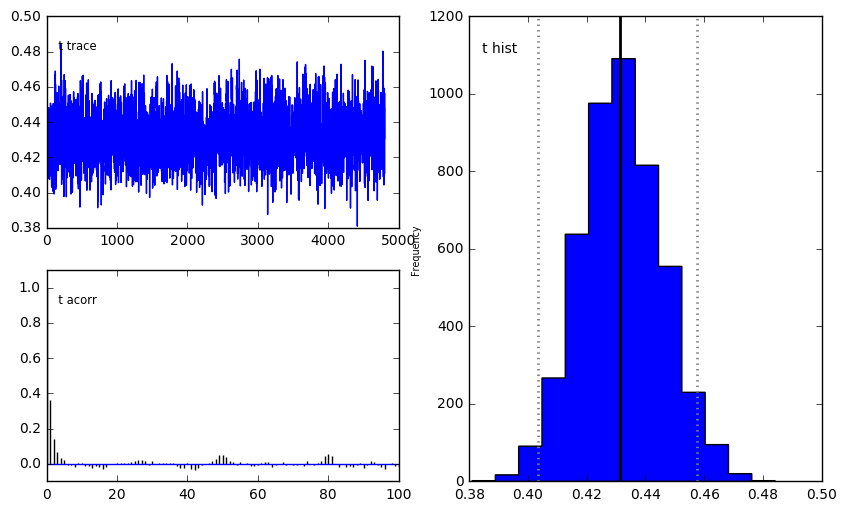

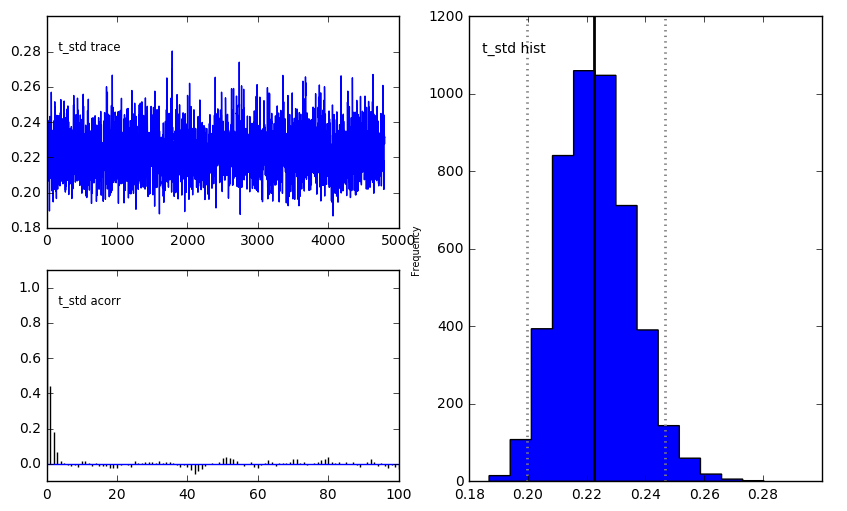

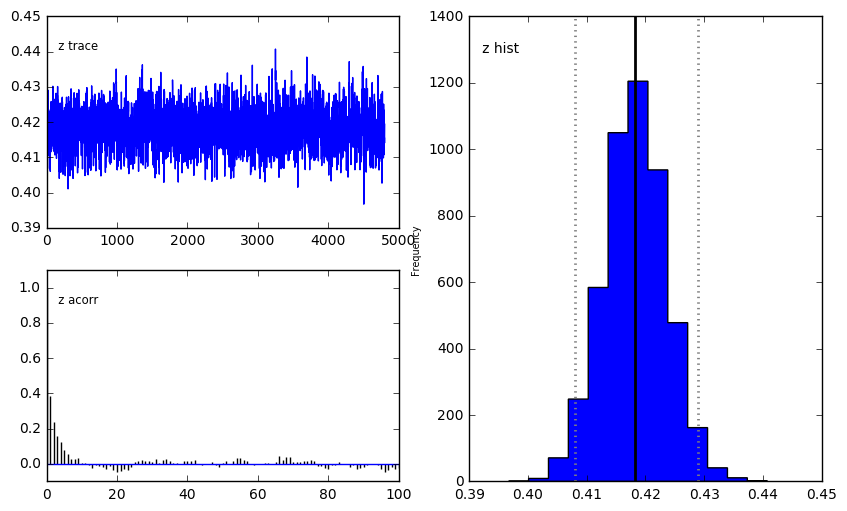

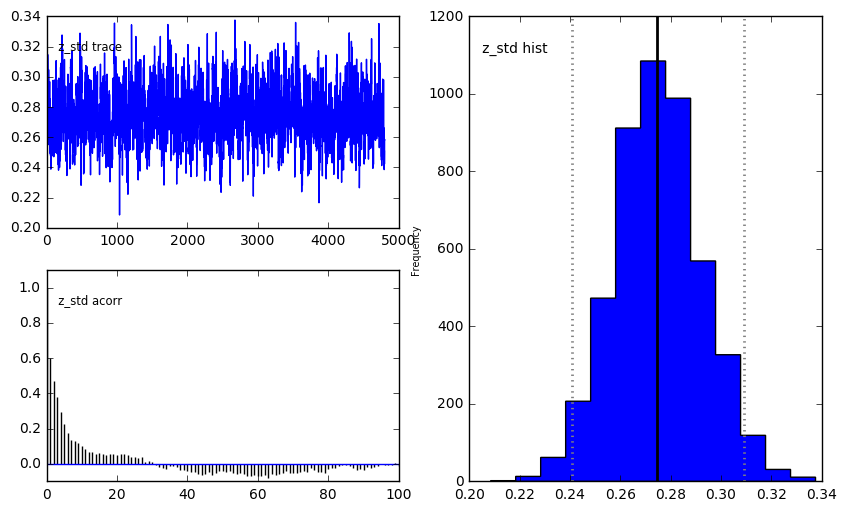

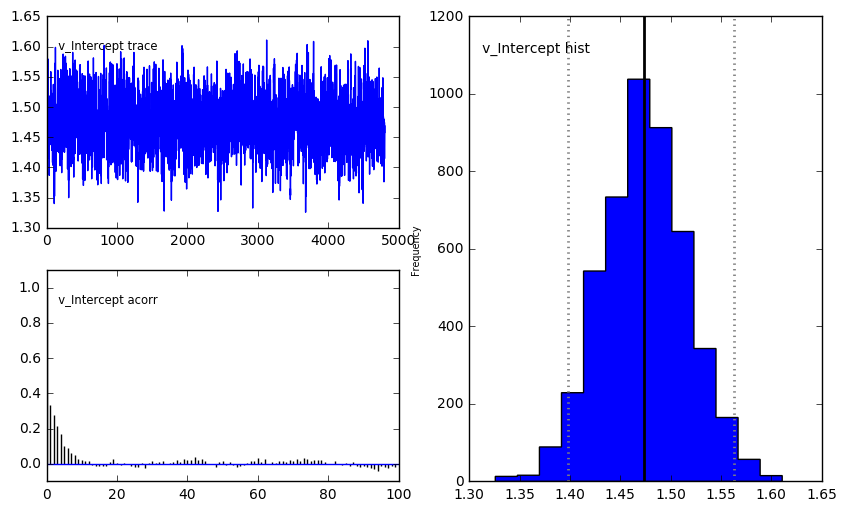

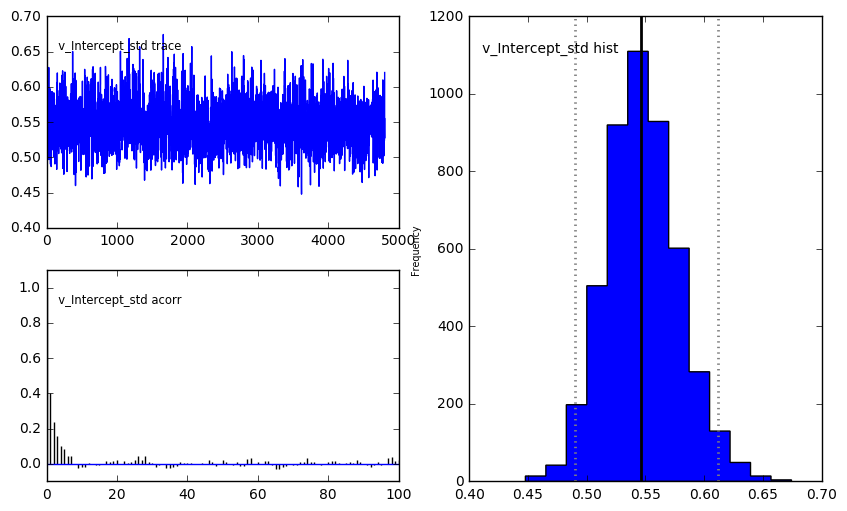

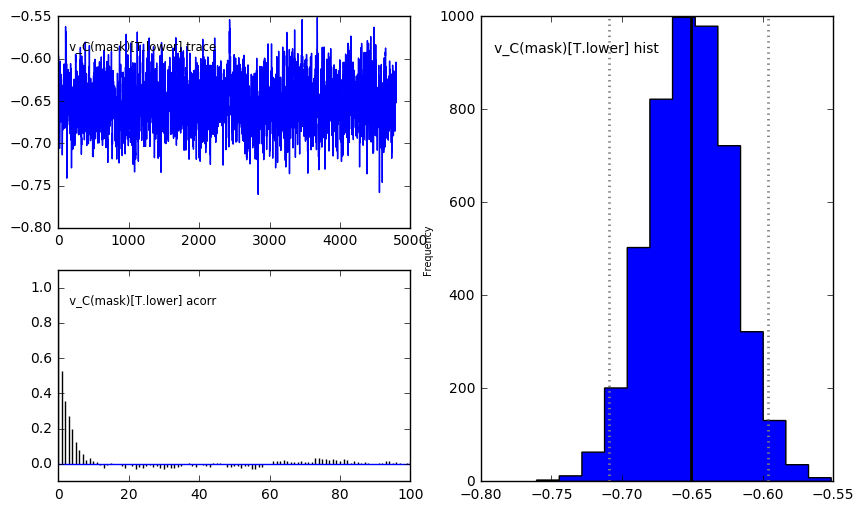

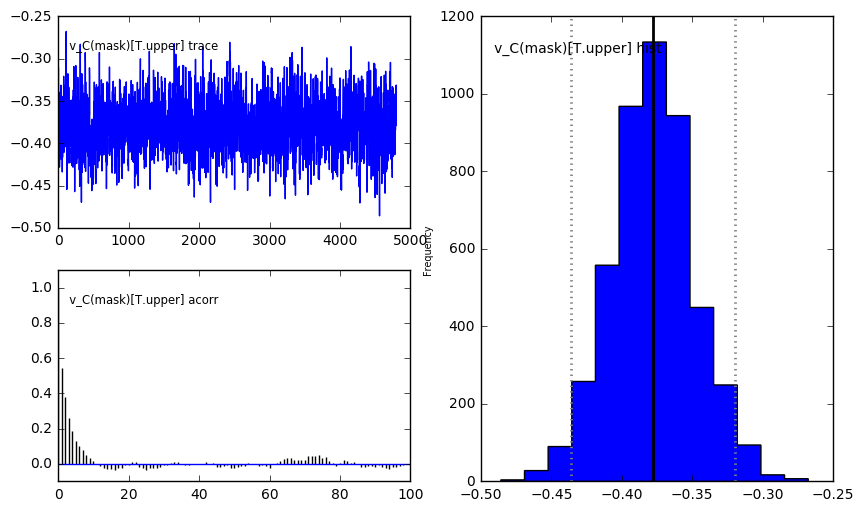

In [23]:
# run model
m_xx2.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_xx2.print_stats()
m_xx2.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                      mean        std       2.5q       25q  \
a                                  1.59429  0.0232408    1.54921   1.57904   
a_std                              0.35386    0.01811    0.32072  0.341011   
a_subj.09coqg8hlpux6fe             1.23749  0.0858264    1.08247   1.17791   
a_subj.0b3t2skj9mlhbkn             1.51703   0.106526    1.31971   1.44354   
a_subj.0bcg7mtj2n1jjw9             3.24757   0.263404    2.77962   3.06751   
a_subj.0s53r30oouek89b             2.20324   0.149027    1.93333   2.09954   
a_subj.0uj9gbhag3o1w1v             1.73215   0.134698    1.49487   1.63829   
a_subj.17nzn4k8r1qkmrn              1.6066   0.104917    1.41299   1.53486   
a_subj.1fdkw2qjx3hc3lk             1.39322  0.0905878    1.22843   1.32856   
a_subj.1mla0dmotqefnav             1.94036   0.132735    1.70357   1.84834   
a_subj.23hr9tl84h3zhw3             1.54668   0.105345    1.35591   1.47372   
a_subj.27muqwvalwne26r             1.93686   0.144028    1.67384

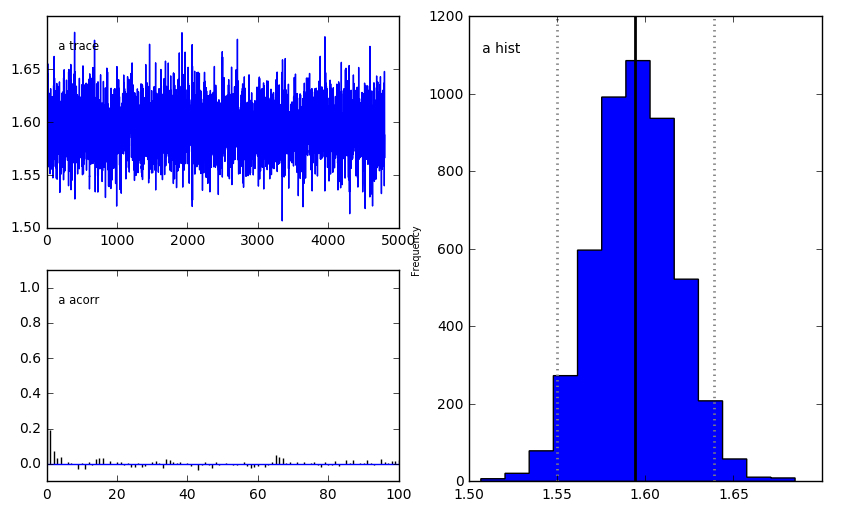

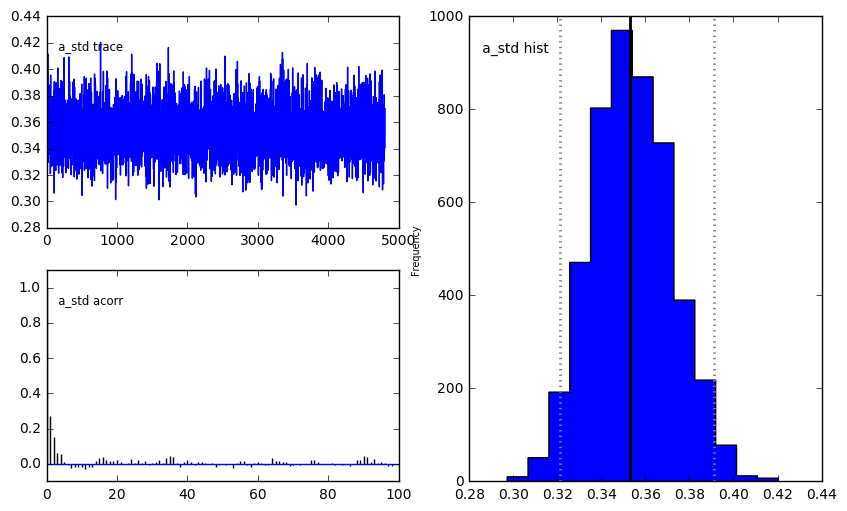

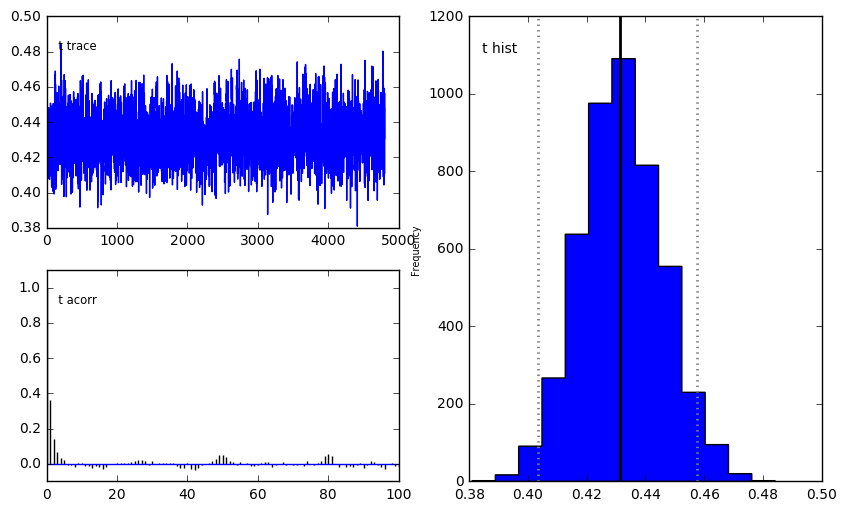

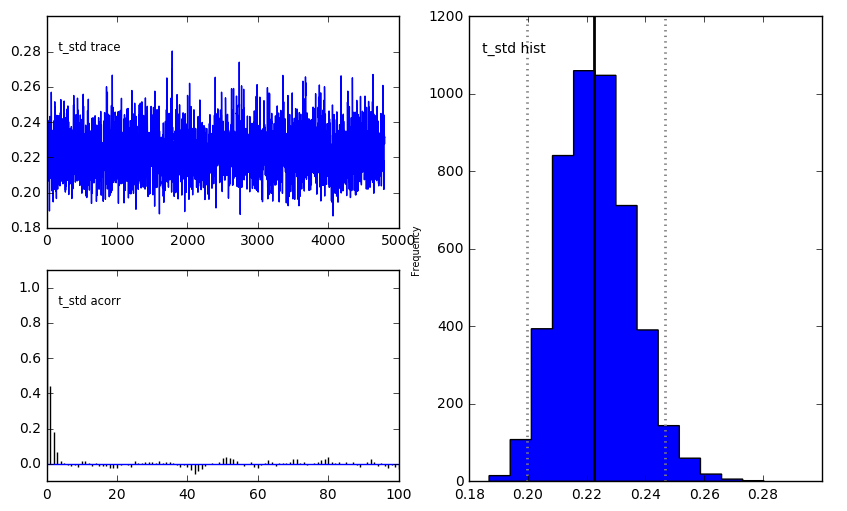

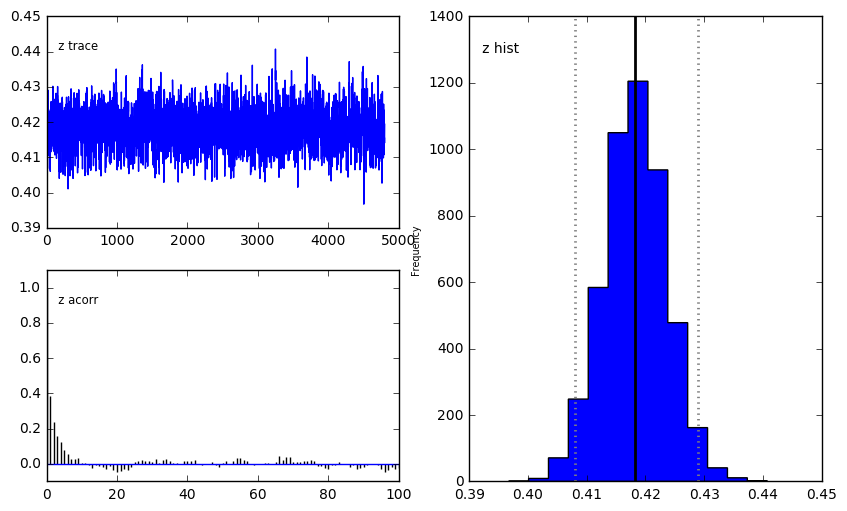

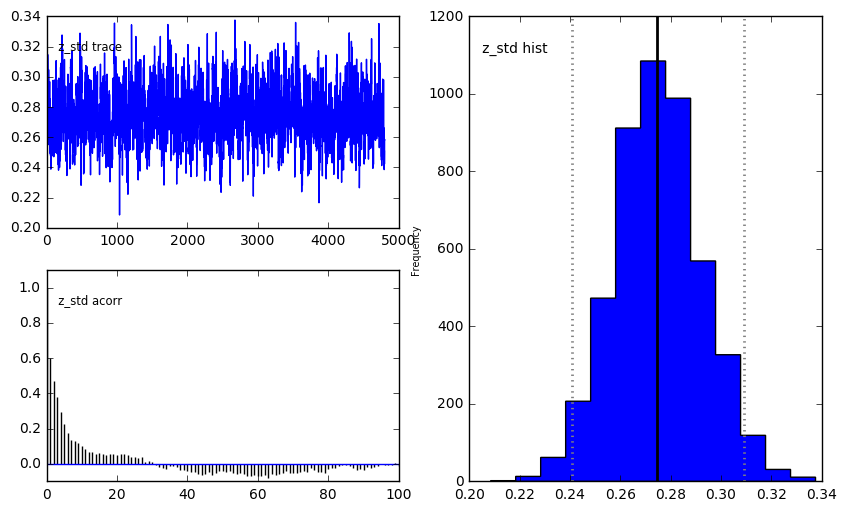

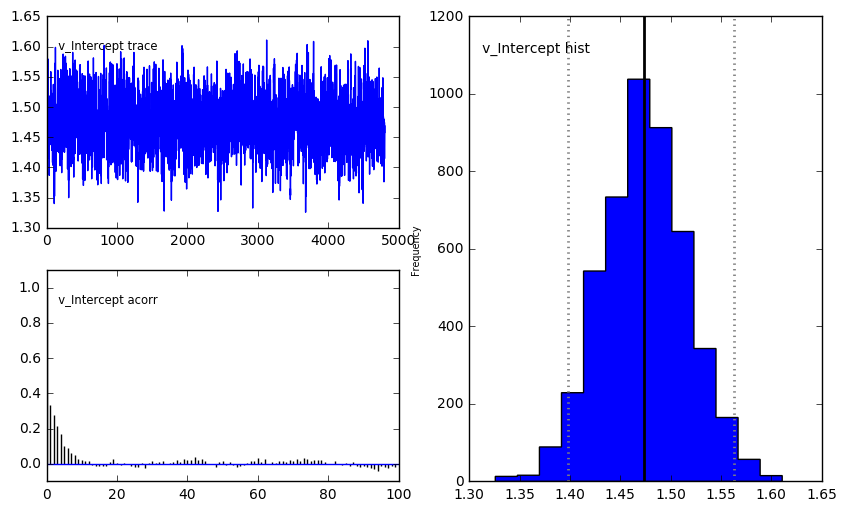

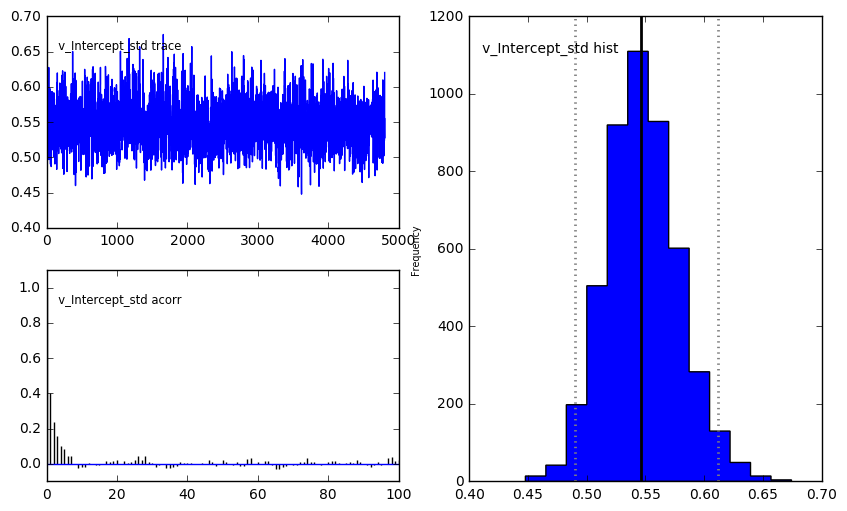

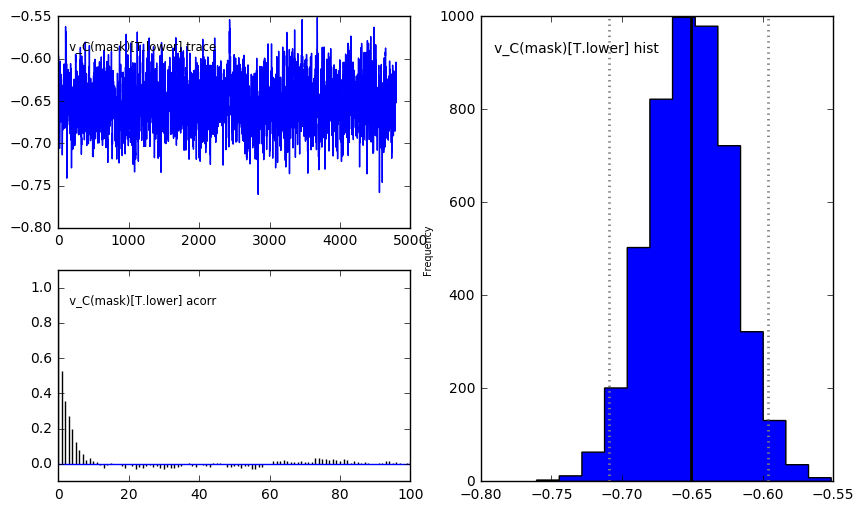

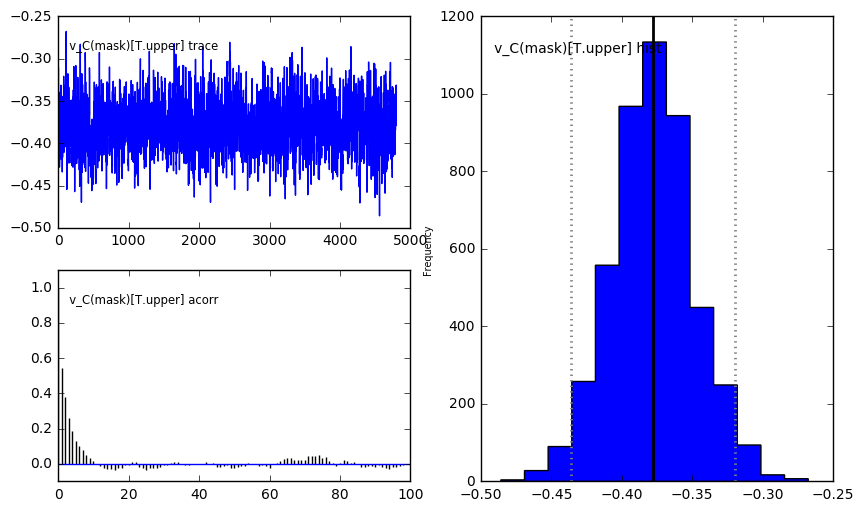

In [24]:
# save model stats
xx2_stats = m_xx2.gen_stats()
print(xx2_stats)
xx2_stats.to_csv('xx2_5000/faceMask2_hddm_drift_maskFalseNegatives_xx2_5000.csv', index=True)

# save model posterior plots
m_xx2.plot_posteriors(path='xx2_5000/_posteriors', save=True)

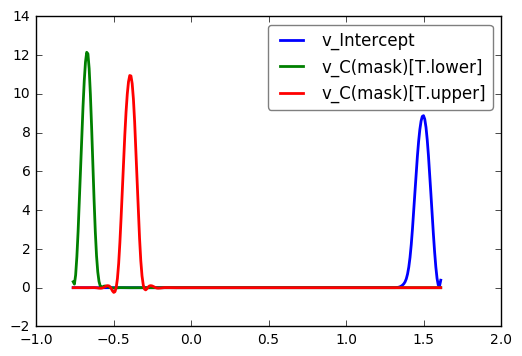

In [25]:
# plot model posteriors by mask
xx2_v_none, xx2_v_lower, xx2_v_upper = m_xx2.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([xx2_v_none, xx2_v_lower, xx2_v_upper])
plt.savefig('xx2_5000/faceMask2_hddm_drift_maskFalsePositives_xx2_5000_v_mask.pdf')

In [26]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(xx2_v_none < 0) = ", (xx2_v_none.trace() < 0).mean())
print("P(xx2_v_lower > 0) = ", (xx2_v_lower.trace() > 0).mean())
print("P(xx2_v_upper > 0) = ", (xx2_v_upper.trace() > 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(xx2_v_lower < xx2_v_upper) = ", (xx2_v_lower.trace() < xx2_v_upper.trace()).mean())

P(xx2_v_none < 0) =  0.0
P(xx2_v_lower > 0) =  0.0
P(xx2_v_upper > 0) =  0.0
P(xx2_v_lower < xx2_v_upper) =  1.0


In [27]:
## estimate probabilities that mask coefficient posteriors differ from each other (faceMask 1 vs. faceMask2)
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(xx1_v_none > xx2_v_none) = ", ((xx1_v_none.trace() > xx2_v_none.trace()).mean()))
print("P(xx1_v_lower < xx2_v_lower) = ", ((xx1_v_lower.trace() < xx2_v_lower.trace()).mean()))
print("P(xx1_v_upper < xx2_v_upper) = ", ((xx1_v_upper.trace() < xx2_v_upper.trace()).mean()))


P(xx1_v_none > xx2_v_none) =  0.0
P(xx1_v_lower < xx2_v_lower) =  0.0
P(xx1_v_upper < xx2_v_upper) =  0.105833333333


In [28]:
## adding together the relative values:
xx1_v_none_plus_lower = xx1_v_none.trace() + xx1_v_lower.trace()
xx1_v_none_plus_upper = xx1_v_none.trace() + xx1_v_upper.trace()
xx2_v_none_plus_lower = xx2_v_none.trace() + xx2_v_lower.trace()
xx2_v_none_plus_upper = xx2_v_none.trace() + xx2_v_upper.trace()

In [29]:
print("P(xx1_v_none_plus_lower > xx2_v_none_plus_lower) = ", (xx1_v_none_plus_lower > xx2_v_none_plus_lower).mean())
print("P(xx1_v_none_plus_upper > xx2_v_none_plus_upper) = ", (xx1_v_none_plus_upper > xx2_v_none_plus_upper).mean())

P(xx1_v_none_plus_lower > xx2_v_none_plus_lower) =  0.308125
P(xx1_v_none_plus_upper > xx2_v_none_plus_upper) =  0.0
